In [93]:
import pandas as pd
import matplotlib.pyplot as plt
import os
import matplotlib.dates as mdates
import numpy as np
from sklearn.preprocessing import Imputer, MinMaxScaler
%matplotlib inline

DATASET_PATH = os.path.join("..", "datasets")


def load_rent_data(mean_rent_path=DATASET_PATH):
    rent_csv = os.path.join(mean_rent_path, "final_dataset_tester1.csv")
    return pd.read_csv(rent_csv)
dataset = load_rent_data()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001B1DE2D1320>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x000001B1E0A497B8>]], dtype=object)

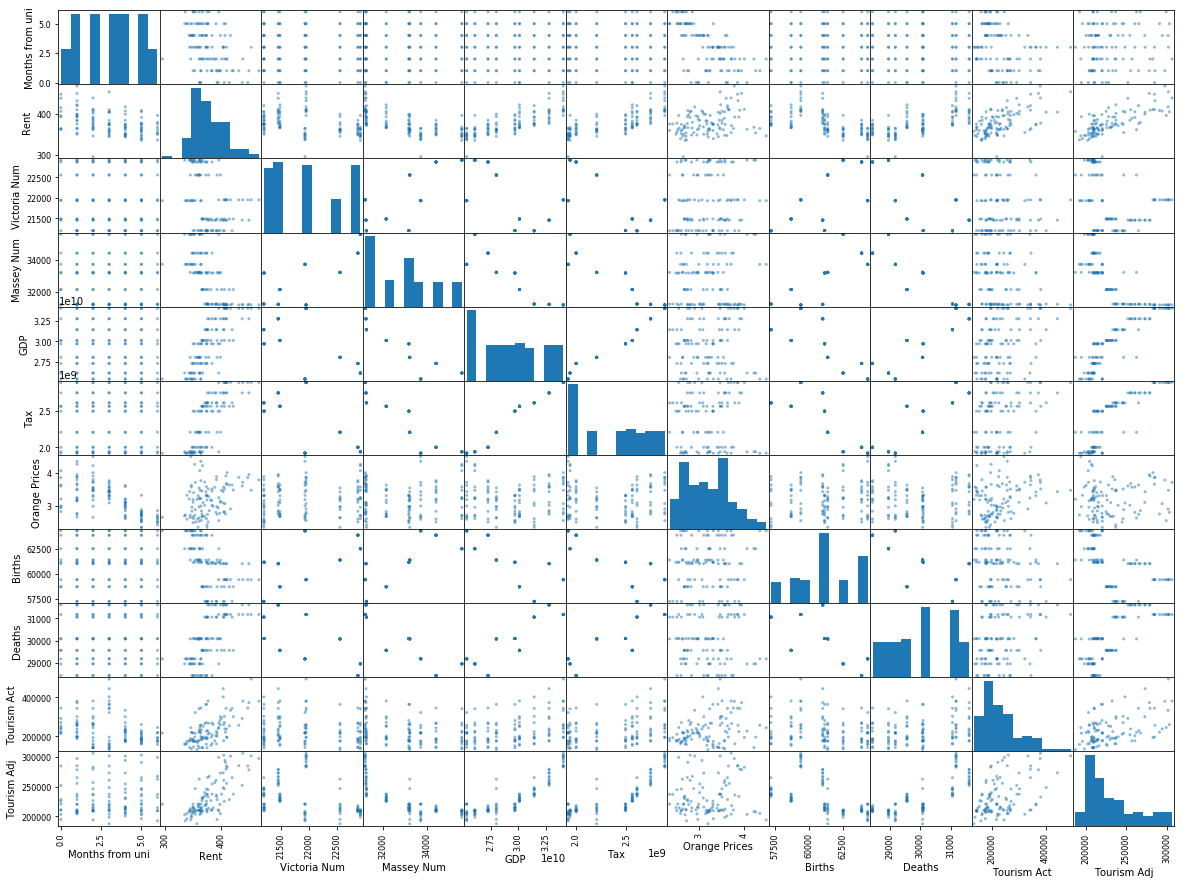

In [94]:
imputer = Imputer(strategy="median")
imputer.fit(dataset)
X = imputer.transform(dataset)
dataset_tr = pd.DataFrame(X, columns=dataset.columns)
from pandas.plotting import scatter_matrix
scatter_matrix(dataset_tr, figsize=(20,15))

In [95]:
corr_matrix = dataset_tr.corr()
corr_matrix["Rent"].sort_values(ascending=False)

Rent               1.000000
GDP                0.788358
Tax                0.759386
Tourism Adj        0.748116
Deaths             0.648687
Tourism Act        0.605484
Orange Prices      0.332372
Victoria Num      -0.353605
Months from uni   -0.414262
Births            -0.560948
Massey Num        -0.672492
Name: Rent, dtype: float64

In [96]:
minmax_scaler = MinMaxScaler()
X = minmax_scaler.fit_transform(dataset_tr)
dataset_tr_2 = pd.DataFrame(X, columns=dataset.columns)

In [97]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X, y = dataset_tr_2[['Months from uni', 'Victoria Num', 'Massey Num', 'GDP', 'Tax', 'Orange Prices', 'Births', 'Deaths', 'Tourism Act', 'Tourism Adj']].values, dataset_tr_2[['Rent']].values
X.shape
y = y.ravel()

In [98]:
clf = SelectKBest(f_regression, k=2)
X = clf.fit_transform(X, y)
clf.get_support()

array([False, False, False,  True,  True, False, False, False, False, False], dtype=bool)

In [99]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
predictions = lin_reg.predict(X)
from sklearn.metrics import mean_squared_error
mean_squared_error(y, predictions)

0.010533850354376793